# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbr
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

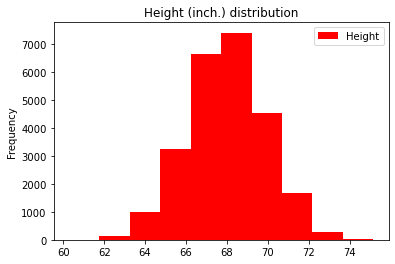

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [4]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


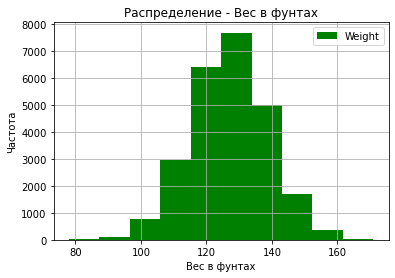

In [5]:
dp = data.plot( y = 'Weight', 
           kind = 'hist',
           color = 'green',
           title = 'Распределение - Вес в фунтах')
dp.set(ylabel = 'Частота',xlabel = 'Вес в фунтах')
dp.grid(True) #нравится мне с сеткой диаграмы

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

In [8]:
#Не уверен "удобности" связки .apply + lambda но, нижеприведенная конструкция с map()
#работает в 40 раз быстрее, но в задании почему то нужно подругому

# METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
# data['BMI'] = list(map(lambda weight, height: 
#                          ((weight / KILO_TO_POUND) / (height / METER_TO_INCH) ** 2), 
#                          data.Weight, data.Height))

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

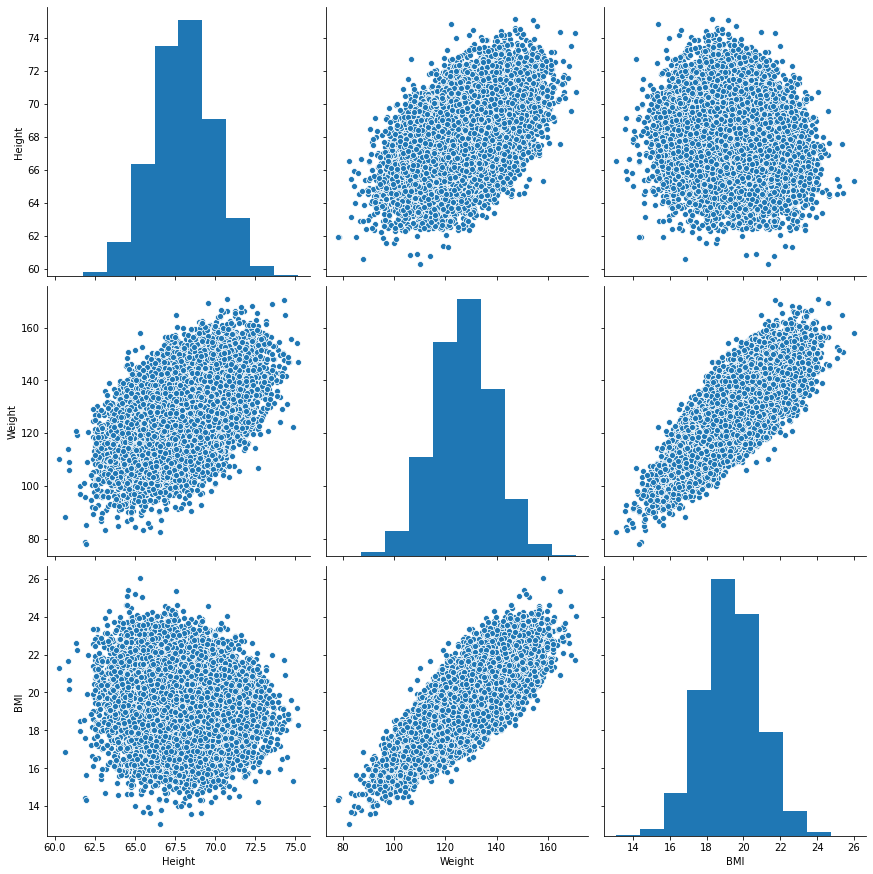

In [9]:
# seaborn.pairplot() это удобный способ быстро оценить визуализацию зависимостей признаков. Но не применим когда признаков много

graph = sbr.pairplot(data , height = 4) 


Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

[Text(0, 0.5, 'Рост'), Text(0.5, 0, 'весовая категория')]

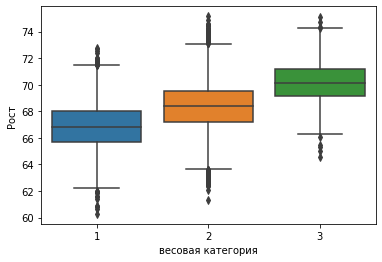

In [10]:
def weight_category(weight) :
    if weight <  120:
        return 1
    elif weight >= 150:
        return 3
    return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
bpt = sbr.boxplot(data = data[['Height' , 'weight_cat']],
                 x = 'weight_cat',
                 y = 'Height')
bpt.set(xlabel = 'весовая категория',
       ylabel = 'Рост')

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

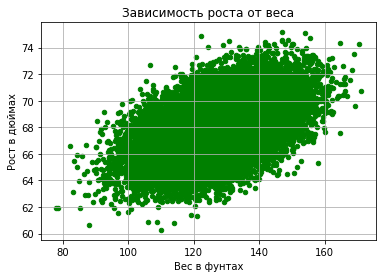

In [11]:
sct_plt = data.plot( x = 'Weight',
                     y = 'Height',
                     kind = 'scatter',
                     color = 'green',
                     title = 'Зависимость роста от веса')
sct_plt.set(xlabel = 'Вес в фунтах', 
            ylabel = 'Рост в дюймах')
sct_plt.grid(True)

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

### Пункт 6

In [12]:
def Serror(W):
    w0, w1 = W[0],W[1] #Для 11 задания пришлось сделать так
    X = data.Weight
    Y = data.Height
    sum_err = 0.0
    for i in range(1, data.shape[0]+1):
        sum_err += (Y[i]-w0-w1*X[i])**2
    return sum_err 


In [13]:
Serror([50,0.15])

111818.61703874671

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

### Пункт 7

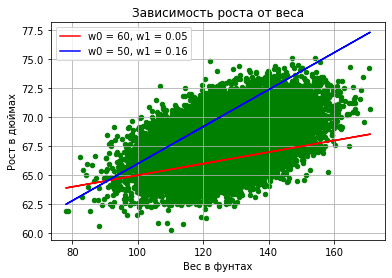

In [14]:
X = np.array(data.Weight) 

#строим данные для первой прямой y = 60 + 0.05*x 
w0 = 60
w1 = 0.05

Y1 = w0 + w1 * X

#строим данные для 2-й прямой y = 50 + 0.16*x
w0 = 50
w1 = 0.16

Y2 = w0 + w1 * X

#повторим график и ...
sct_plt = data.plot( x = 'Weight',
                     y = 'Height',
                     kind = 'scatter',
                     color = 'green',
                     title = 'Зависимость роста от веса')
sct_plt.set(xlabel = 'Вес в фунтах', 
            ylabel = 'Рост в дюймах')
# построим прямые регрессии для разных параметров
line1 = plt.plot(X, Y1, color = 'red', label = 'w0 = 60, w1 = 0.05' )
line2 = plt.plot(X, Y2, color = 'blue', label = 'w0 = 50, w1 = 0.16' )

sct_plt.legend(loc = 'upper left')
sct_plt.grid(True)

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

### Пункт 8

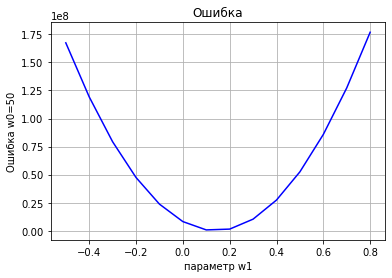

In [15]:
w0 = 50
X_range = np.arange(-0.5, 0.9, 0.1) #здесь можно варьировать границами диапазона для лучшей визуализации
Y_err = [Serror([w0, i]) for i in X_range]
graph_err = plt.plot(X_range , Y_err, color = 'blue', label = 'Функционал ошибки')
plt.title('Ошибка')
plt.xlabel('параметр w1')
plt.ylabel('Ошибка w0=50')
plt.grid(True)

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

### Пункт 9

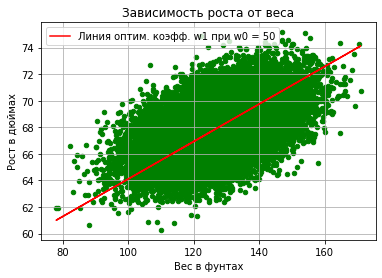

In [16]:
from scipy.optimize import minimize_scalar

def Serror_50(w1):            
    return Serror([50,w1])      

min_SE = minimize_scalar(Serror_50, bounds = (-5,5), method = 'bounded')
w1_opt = min_SE.x

X = np.array(data.Weight) 

w0 = 50
Y = w0 + w1_opt * X

#повторяю точечный график и 
sct_plt = data.plot( x = 'Weight',
                     y = 'Height',
                     kind = 'scatter',
                     color = 'green',
                     title = 'Зависимость роста от веса')
sct_plt.set(xlabel = 'Вес в фунтах', 
            ylabel = 'Рост в дюймах')

# строю прямую для w0=50 и w1, найденного методом оптимизиции 
#minimize scalar 
plt.plot(X, Y, color = 'red', label = 'Линия оптим. коэфф. w1 при w0 = 50' )
plt.legend(loc = 'upper left')
plt.grid(True)

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [17]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

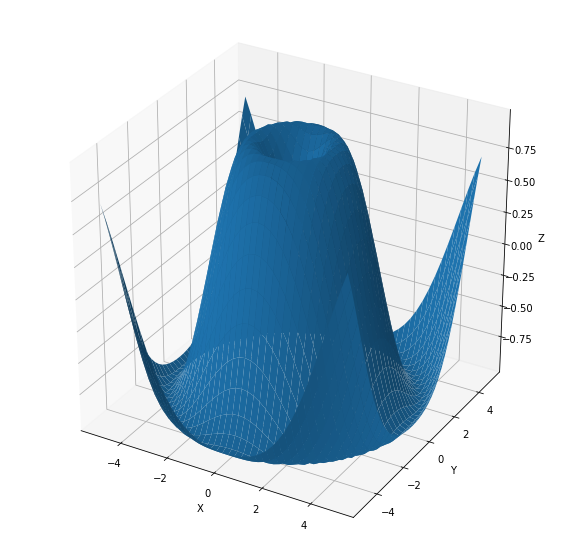

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

### Пункт 10

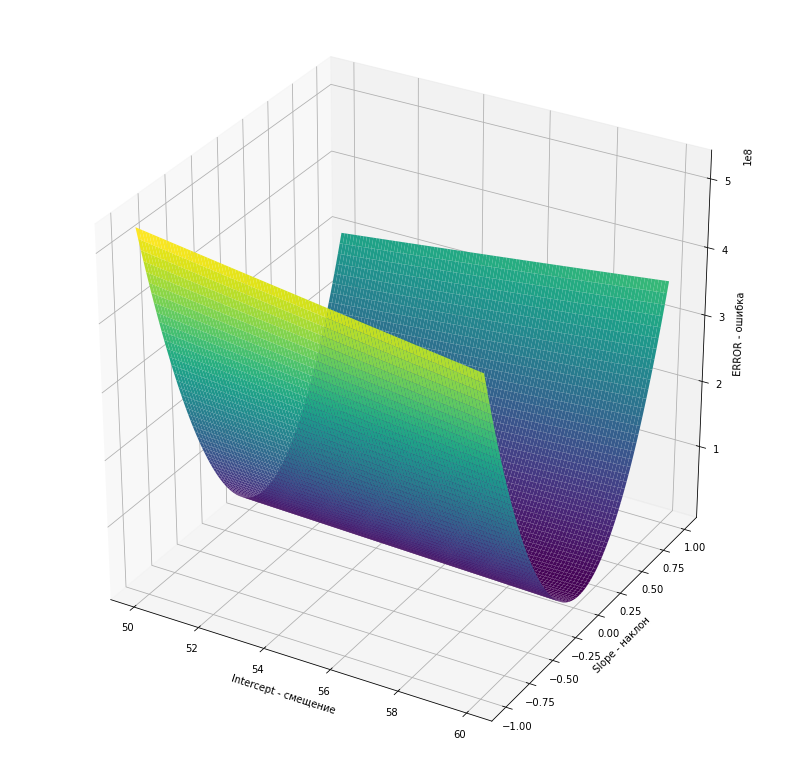

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

# создаём канву для рисунка
fig = plt.figure(figsize = (14, 14))

# создаём рисунок пространства с поверхностью
axs = fig.add_subplot(1, 1, 1, projection = '3d')
# Подписываем оси
axs.set_xlabel('Intercept - смещение')
axs.set_ylabel('Slope - наклон')
axs.set_zlabel('ERROR - ошибка')

# размечаем границы осей для аргументов
xval = np.linspace(50, 60, 100) 
yval = np.linspace(-1, 1, 100)

x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = Serror([x, y])

# создаём поверхность
surf = axs.plot_surface( x, y, z, rstride = 1, cstride = 1, cmap = cm.viridis)
# отображаем 
plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

### Пункт 11

In [20]:
import scipy.optimize as optimize
  
bnds = ((-100,100),(-5,5))

M_err = optimize.minimize(Serror, [0,0], method='L-BFGS-B',bounds=bnds )

In [21]:
print(M_err.x[0] , M_err.x[1])

57.57182064303099 0.08200614341637635


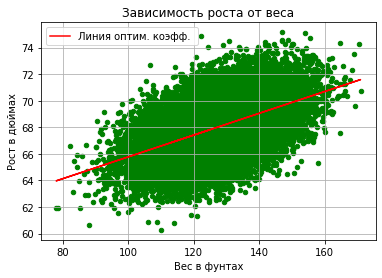

In [22]:
# Строим линию регрессии, используя коэффиценты полученные оптимизацией, используя
# optimize.minimize метод библ-ки scipy

X = np.array(data.Weight) 

w0, w1 = M_err.x[0], M_err.x[1] 

Y = w0 + w1 * X
#повторяю точечный график и 
sct_plt = data.plot( x = 'Weight',
                     y = 'Height',
                     kind = 'scatter',
                     color = 'green',
                     title = 'Зависимость роста от веса')
sct_plt.set(xlabel = 'Вес в фунтах', 
            ylabel = 'Рост в дюймах')

plt.plot(X, Y, color = 'red', label = 'Линия оптим. коэфф. ' )
plt.legend(loc = 'upper left')
plt.grid(True)

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)